# 二手车交易baseline

In [2]:
import pandas as pd
import numpy as np
from lightgbm.sklearn import LGBMRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [5]:
train = pd.read_csv('./used_car_train_20200313.csv',sep=' ')
test = pd.read_csv('./used_car_testA_20200313.csv',sep=' ')

In [6]:
train.head(10)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
5,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,...,0.260246,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573
6,6,2402,19990411,13.0,4,0.0,0.0,1.0,150,15.0,...,0.267998,0.117675,0.142334,0.025446,0.028174,-4.902200,1.610616,-0.834605,-1.996117,-0.103180
7,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,...,0.239506,0.000000,0.122943,0.039839,0.082413,3.693829,-0.245014,-2.192810,0.236728,0.195567
8,8,2974,20030205,19.0,1,2.0,1.0,1.0,179,15.0,...,0.263833,0.116583,0.144255,0.039851,0.024388,-4.925234,1.587796,0.075348,-1.551098,0.069433
9,9,82021,19980101,7.0,7,5.0,0.0,0.0,88,15.0,...,0.262473,0.068267,0.012176,0.010291,0.098727,-1.089584,0.600683,-4.186210,0.198273,-1.025822


In [7]:
train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


看起来model bodyType gearbox几列存在空置

In [8]:
train.isnull().any()

SaleID               False
name                 False
regDate              False
model                 True
brand                False
bodyType              True
fuelType              True
gearbox               True
power                False
kilometer            False
notRepairedDamage    False
regionCode           False
seller               False
offerType            False
creatDate            False
price                False
v_0                  False
v_1                  False
v_2                  False
v_3                  False
v_4                  False
v_5                  False
v_6                  False
v_7                  False
v_8                  False
v_9                  False
v_10                 False
v_11                 False
v_12                 False
v_13                 False
v_14                 False
dtype: bool

总共150000条，缺失的最多的列差不多缺了8000多条

In [9]:
train[['model','bodyType','fuelType','gearbox']].describe()

,model,bodyType,fuelType,gearbox
count,149999.000000,145494.000000,141320.000000,144019.000000
mean,47.129021,1.792369,0.375842,0.224943
std,49.536040,1.760640,0.548677,0.417546
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,0.000000,0.000000
75%,66.000000,3.000000,1.000000,0.000000
max,247.000000,7.000000,6.000000,1.000000


看起来缺失值直接删的话 还剩135000多条

In [10]:
train.dropna().describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,135884.000000,135884.000000,1.358840e+05,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,...,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000
mean,75034.991434,67144.366967,2.003610e+07,47.966810,8.027627,1.801618,0.375423,0.228548,124.201076,12.564713,...,0.256032,0.046786,0.089826,0.058775,0.063074,-0.373742,-0.469310,-0.076532,0.025200,0.008456
std,43309.047314,60962.383043,5.382424e+04,49.793536,7.864106,1.767968,0.547637,0.419899,172.918350,3.897382,...,0.014009,0.052114,0.043399,0.029019,0.035364,3.470853,1.878271,2.332124,1.290922,1.050417
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.203718,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.074922,-6.546556
25%,37495.750000,10395.250000,1.999111e+07,11.000000,1.000000,0.000000,0.000000,0.000000,75.000000,10.000000,...,0.245445,0.000102,0.060971,0.035931,0.034928,-3.869531,-2.019539,-1.847251,-1.034738,-0.426907
50%,75050.500000,49469.000000,2.004000e+07,30.000000,6.000000,1.000000,0.000000,0.000000,115.000000,15.000000,...,0.258574,0.000895,0.093787,0.057801,0.059771,1.393099,-0.441911,-0.149740,-0.005461,0.155026
75%,112527.250000,116988.000000,2.008021e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265601,0.103096,0.122140,0.080029,0.088349,2.697569,1.130275,1.694543,0.971153,0.700543
max,149999.000000,196812.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,17932.000000,15.000000,...,0.291838,0.151420,0.250896,0.151107,0.213617,5.831949,3.726617,7.800208,5.249750,2.743993


In [11]:
train.fillna(-999,inplace=True)
test.fillna(-999,inplace=True)

看看有哪些列，其中price是要预测的

In [12]:
train.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [13]:
%matplotlib inline

In [14]:
price  = train['price']

In [15]:
price_log = np.log(price)

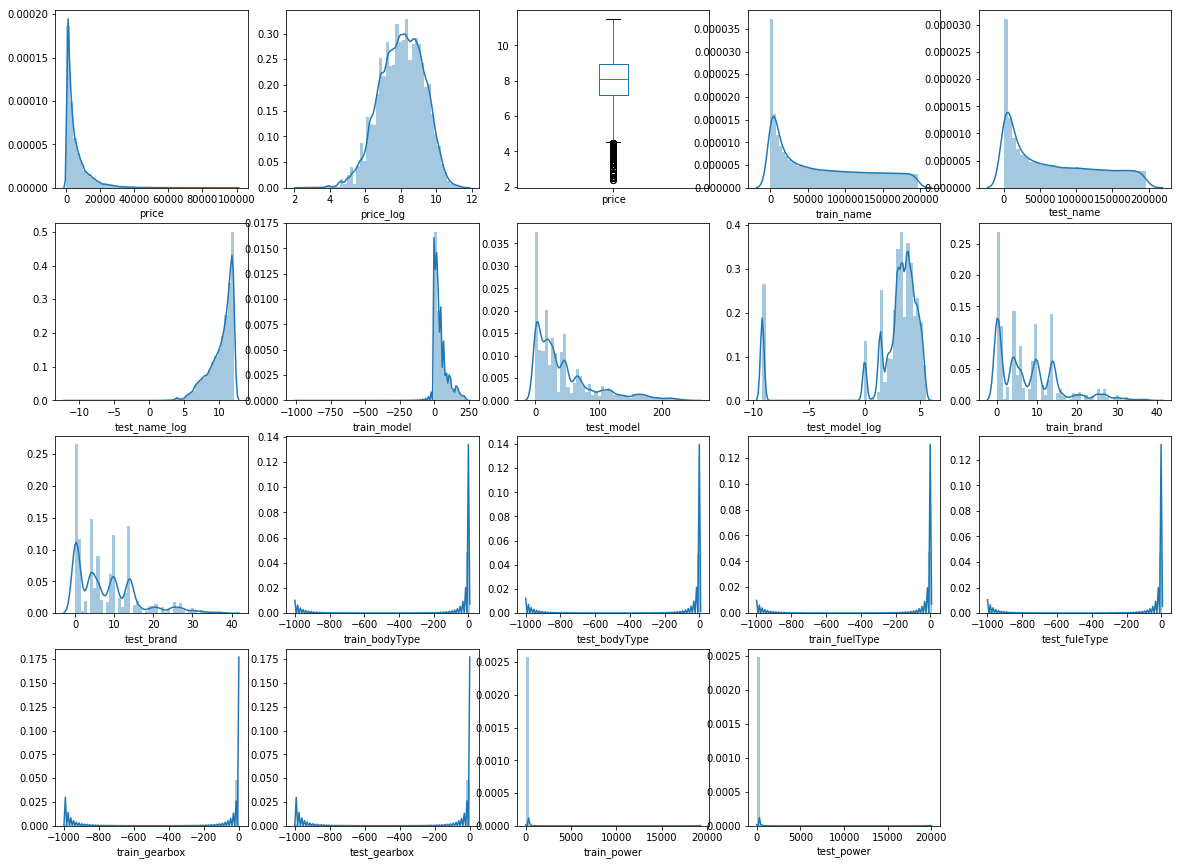

In [16]:
plt.figure(figsize=(20,15))
plt.subplot(4,5,1)
sns.distplot(price)
plt.subplot(4,5,2)
sns.distplot(price_log,axlabel='price_log')
plt.subplot(4,5,3)
price_log.plot.box()
plt.subplot(4,5,4)
sns.distplot(train['name'],axlabel='train_name')
plt.subplot(4,5,5)
sns.distplot(test['name'],axlabel='test_name')
plt.subplot(4,5,6)
sns.distplot(np.log(test['name']+0.00001),axlabel='test_name_log')
plt.subplot(4,5,7)
sns.distplot(train['model'],axlabel='train_model')
plt.subplot(4,5,8)
sns.distplot(test['model'],axlabel='test_model')
plt.subplot(4,5,9)
sns.distplot(np.log(test['model']+0.0001),axlabel='test_model_log')
plt.subplot(4,5,10)
sns.distplot(train['brand'],axlabel='train_brand')
plt.subplot(4,5,11)
sns.distplot(test['brand'],axlabel='test_brand')
plt.subplot(4,5,12)
sns.distplot(train['bodyType'],axlabel='train_bodyType')
plt.subplot(4,5,13)
sns.distplot(test['bodyType'],axlabel='test_bodyType')
plt.subplot(4,5,14)
sns.distplot(train['fuelType'],axlabel='train_fuelType')
plt.subplot(4,5,15)
sns.distplot(test['fuelType'],axlabel='test_fuleType')
plt.subplot(4,5,16)
sns.distplot(train['gearbox'],axlabel='train_gearbox')
plt.subplot(4,5,17)
sns.distplot(test['gearbox'],axlabel='test_gearbox')
plt.subplot(4,5,18)
sns.distplot(train['power'],axlabel='train_power')
plt.subplot(4,5,19)
sns.distplot(test['power'],axlabel='test_power')

In [17]:
train['power'].describe()

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       19312.000000
Name: power, dtype: float64

根据题目，大于600的属于非正常范围，考虑 train上删除记录，test上暂定截断

In [18]:
test['power'].describe()

count    50000.000000
mean       119.883620
std        185.097387
min          0.000000
25%         75.000000
50%        109.000000
75%        150.000000
max      20000.000000
Name: power, dtype: float64

In [19]:
train = train.drop('price',axis=1)
train['notRepairedDamage'] = train['notRepairedDamage'].map(lambda x: -1 if(x=='-') else x)
train['notRepairedDamage'] = train['notRepairedDamage'].map(lambda x: float(x))
test['notRepairedDamage'] = test['notRepairedDamage'].map(lambda x: -1 if(x=='-') else x)
test['notRepairedDamage'] = test['notRepairedDamage'].map(lambda x: float(x))

D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


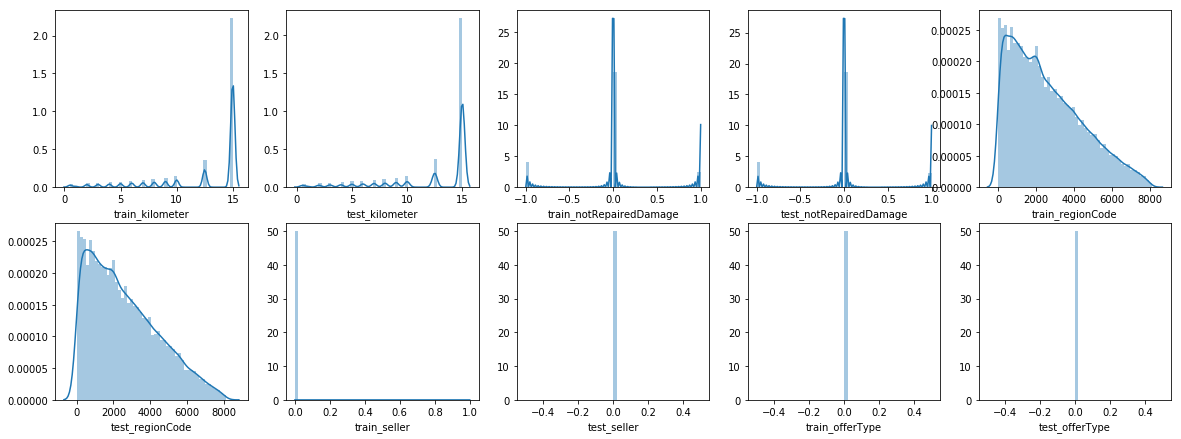

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(4,5,1)
sns.distplot(train['kilometer'],axlabel='train_kilometer')
plt.subplot(4,5,2)
sns.distplot(test['kilometer'],axlabel='test_kilometer')
plt.subplot(4,5,3)
sns.distplot(train['notRepairedDamage'],axlabel='train_notRepairedDamage')
plt.subplot(4,5,4)
sns.distplot(test['notRepairedDamage'],axlabel='test_notRepairedDamage')
plt.subplot(4,5,5)
sns.distplot(train['regionCode'],axlabel='train_regionCode')
plt.subplot(4,5,6)
sns.distplot(test['regionCode'],axlabel='test_regionCode')
plt.subplot(4,5,7)
sns.distplot(train['seller'],axlabel='train_seller')
plt.subplot(4,5,8)
sns.distplot(test['seller'],axlabel='test_seller')
plt.subplot(4,5,9)
sns.distplot(train['offerType'],axlabel='train_offerType')
plt.subplot(4,5,10)
sns.distplot(test['offerType'],axlabel='test_offerType')

seller、offerType字段 test上就一个值 木什么用 可以拿掉

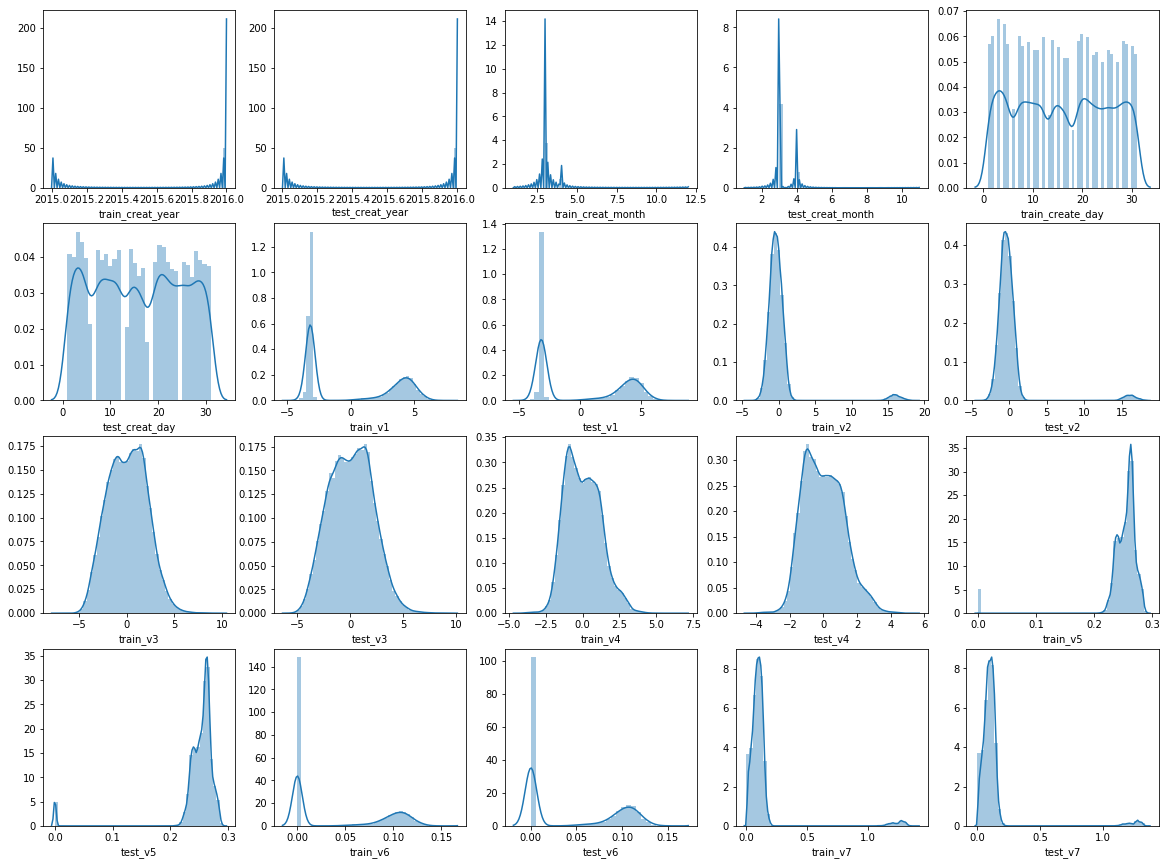

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(4,5,1)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[:4])),axlabel='train_creat_year')
plt.subplot(4,5,2)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[:4])),axlabel='test_creat_year')
plt.subplot(4,5,3)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[4:6])),axlabel='train_creat_month')
plt.subplot(4,5,4)
sns.distplot(test['creatDate'].map(lambda x: int(str(x)[4:6])),axlabel = 'test_creat_month')
plt.subplot(4,5,5)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[6:])),axlabel='train_create_day')
plt.subplot(4,5,6)
sns.distplot(test['creatDate'].map(lambda x: int(str(x)[6:])),axlabel='test_creat_day')
plt.subplot(4,5,7)
sns.distplot(train['v_1'],axlabel='train_v1')
plt.subplot(4,5,8)
sns.distplot(test['v_1'],axlabel='test_v1')
plt.subplot(4,5,9)
sns.distplot(train['v_2'],axlabel='train_v2')
plt.subplot(4,5,10)
sns.distplot(test['v_2'],axlabel='test_v2')
plt.subplot(4,5,11)
sns.distplot(train['v_3'],axlabel='train_v3')
plt.subplot(4,5,12)
sns.distplot(test['v_3'],axlabel='test_v3')
plt.subplot(4,5,13)
sns.distplot(train['v_4'],axlabel='train_v4')
plt.subplot(4,5,14)
sns.distplot(test['v_4'],axlabel='test_v4')
plt.subplot(4,5,15)
sns.distplot(train['v_5'],axlabel='train_v5')
plt.subplot(4,5,16)
sns.distplot(test['v_5'],axlabel='test_v5')
plt.subplot(4,5,17)
sns.distplot(train['v_6'],axlabel='train_v6')
plt.subplot(4,5,18)
sns.distplot(test['v_6'],axlabel='test_v6')
plt.subplot(4,5,19)
sns.distplot(train['v_7'],axlabel='train_v7')
plt.subplot(4,5,20)
sns.distplot(test['v_7'],axlabel='test_v7')

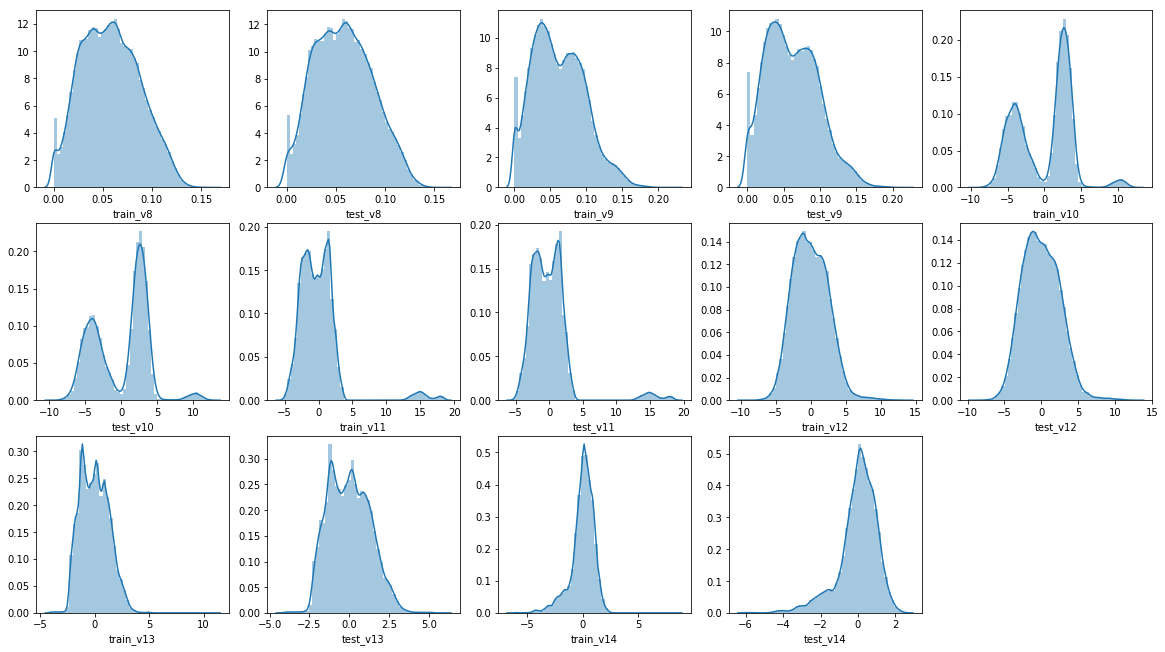

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(4,5,1)
sns.distplot(train['v_8'],axlabel='train_v8')
plt.subplot(4,5,2)
sns.distplot(test['v_8'],axlabel='test_v8')
plt.subplot(4,5,3)
sns.distplot(train['v_9'],axlabel='train_v9')
plt.subplot(4,5,4)
sns.distplot(test['v_9'],axlabel='test_v9')
plt.subplot(4,5,5)
sns.distplot(train['v_10'],axlabel='train_v10')
plt.subplot(4,5,6)
sns.distplot(test['v_10'],axlabel='test_v10')
plt.subplot(4,5,7)
sns.distplot(train['v_11'],axlabel='train_v11')
plt.subplot(4,5,8)
sns.distplot(test['v_11'],axlabel='test_v11')
plt.subplot(4,5,9)
sns.distplot(train['v_12'],axlabel='train_v12')
plt.subplot(4,5,10)
sns.distplot(test['v_12'],axlabel='test_v12')
plt.subplot(4,5,11)
sns.distplot(train['v_13'],axlabel='train_v13')
plt.subplot(4,5,12)
sns.distplot(test['v_13'],axlabel='test_v13')
plt.subplot(4,5,13)
sns.distplot(train['v_14'],axlabel='train_v14')
plt.subplot(4,5,14)
sns.distplot(test['v_14'],axlabel='test_v14')

观察到训练集上测试集上v13 v14分布有些不一致

In [23]:
train[['v_13','v_14']].describe()

,v_13,v_14
count,150000.000000,150000.000000
mean,0.000313,-0.000688
std,1.288988,1.038685
min,-4.153899,-6.546556
25%,-1.057789,-0.437034
50%,-0.036245,0.141246
75%,0.942813,0.680378
max,11.147669,8.658418


In [24]:
test[['v_13','v_14']].describe()

,v_13,v_14
count,50000.000000,50000.000000
mean,-0.003147,0.001516
std,1.286597,1.027360
min,-4.123333,-6.112667
25%,-1.060428,-0.437920
50%,-0.035956,0.138799
75%,0.941469,0.681163
max,5.913273,2.624622


In [25]:
train[['regDate','creatDate']].head(10)

,regDate,creatDate
0,20040402,20160404
1,20030301,20160309
2,20040403,20160402
3,19960908,20160312
4,20120103,20160313
5,20090602,20160319
6,19990411,20160317
7,19990706,20160326
8,20030205,20160326
9,19980101,20160402


In [26]:
train['year_var'] = train['creatDate'].map(lambda x: int(str(x)[:4])) -  train['regDate'].map(lambda x: int(str(x)[:4]))
train['month_var'] = train['creatDate'].map(lambda x: int(str(x)[4:6])) -  train['regDate'].map(lambda x: int(str(x)[4:6]))
train['day_var'] = train['creatDate'].map(lambda x: int(str(x)[6:])) -  train['regDate'].map(lambda x: int(str(x)[6:]))

In [27]:
test['year_var'] = test['creatDate'].map(lambda x: int(str(x)[:4])) -  test['regDate'].map(lambda x: int(str(x)[:4]))
test['month_var'] = test['creatDate'].map(lambda x: int(str(x)[4:6])) -  test['regDate'].map(lambda x: int(str(x)[4:6]))
test['day_var'] = test['creatDate'].map(lambda x: int(str(x)[6:])) -  test['regDate'].map(lambda x: int(str(x)[6:]))

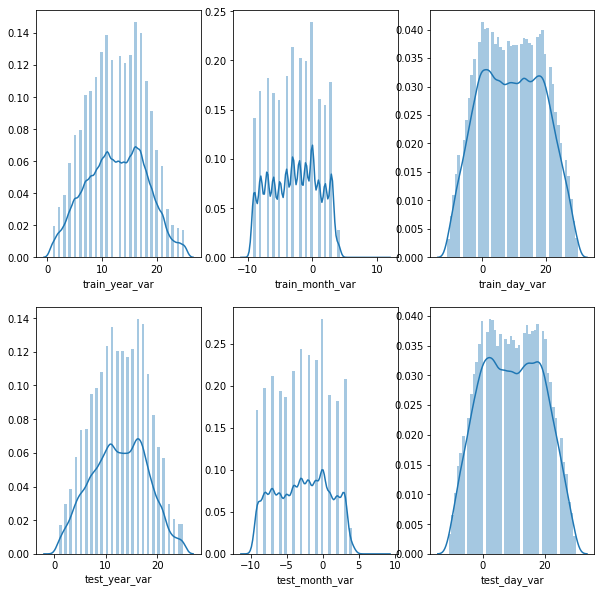

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.distplot(train['year_var'],axlabel='train_year_var')
plt.subplot(2,3,2)
sns.distplot(train['month_var'],axlabel='train_month_var')
plt.subplot(2,3,3)
sns.distplot(train['day_var'],axlabel='train_day_var')
plt.subplot(2,3,4)
sns.distplot(test['year_var'],axlabel='test_year_var')
plt.subplot(2,3,5)
sns.distplot(test['month_var'],axlabel='test_month_var')
plt.subplot(2,3,6)
sns.distplot(test['day_var'],axlabel='test_day_var')

In [29]:
len(train.columns)

33

In [30]:
len(test.columns)

33

In [31]:
mask = (train['power']<600) & (train['seller']==0) & (train['v_13']<6) &(train['v_14']<2.8)

In [32]:
train = train[mask]

In [33]:
price_log = price_log[mask]

In [34]:
price = price[mask]

In [35]:
train.drop(['seller','offerType'],axis=1,inplace=True)
test.drop(['seller','offerType'],axis=1,inplace=True)

In [36]:
test['power'] = test['power'].map(lambda x: x if(x<600) else 600)

In [37]:
corr = train.corr()

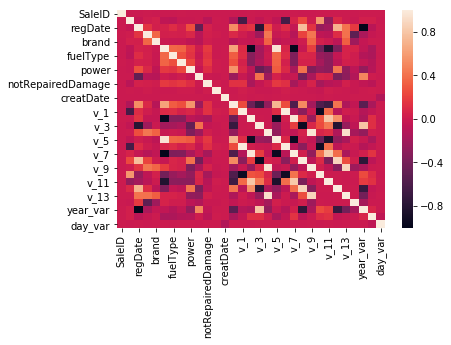

In [38]:
sns.heatmap(corr,)

In [39]:
train_x,val_x,train_y,val_y = train_test_split(train,price_log)

In [40]:
lgb1 = LGBMRegressor(n_estimators=2000,num_leaves=90,max_depth=13,early_stopping_round=50,metric=['l1'])

In [41]:
lgb1.fit(train_x,train_y,eval_set=[(val_x,val_y)],eval_metric='l1')

D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 0.905721
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.822149
[3]	valid_0's l1: 0.747221
[4]	valid_0's l1: 0.680076
[5]	valid_0's l1: 0.620082
[6]	valid_0's l1: 0.566517
[7]	valid_0's l1: 0.518854
[8]	valid_0's l1: 0.476489
[9]	valid_0's l1: 0.438769
[10]	valid_0's l1: 0.405157
[11]	valid_0's l1: 0.375371
[12]	valid_0's l1: 0.34882
[13]	valid_0's l1: 0.325321
[14]	valid_0's l1: 0.304232
[15]	valid_0's l1: 0.285767
[16]	valid_0's l1: 0.269207
[17]	valid_0's l1: 0.254695
[18]	valid_0's l1: 0.241795
[19]	valid_0's l1: 0.230285
[20]	valid_0's l1: 0.220289
[21]	valid_0's l1: 0.211496
[22]	valid_0's l1: 0.203685
[23]	valid_0's l1: 0.196789
[24]	valid_0's l1: 0.190608
[25]	valid_0's l1: 0.185538
[26]	valid_0's l1: 0.180845
[27]	valid_0's l1: 0.176701
[28]	valid_0's l1: 0.173136
[29]	valid_0's l1: 0.169997
[30]	valid_0's l1: 0.167194
[31]	valid_0's l1: 0.164599
[32]	valid_0's l1: 0.162345
[33]	valid_0's l1: 0.160344
[34]	valid_0's l1: 0.1586

[288]	valid_0's l1: 0.126627
[289]	valid_0's l1: 0.126576
[290]	valid_0's l1: 0.12652
[291]	valid_0's l1: 0.126468
[292]	valid_0's l1: 0.126468
[293]	valid_0's l1: 0.12643
[294]	valid_0's l1: 0.12641
[295]	valid_0's l1: 0.126393
[296]	valid_0's l1: 0.126359
[297]	valid_0's l1: 0.126352
[298]	valid_0's l1: 0.126333
[299]	valid_0's l1: 0.126316
[300]	valid_0's l1: 0.126304
[301]	valid_0's l1: 0.126298
[302]	valid_0's l1: 0.126303
[303]	valid_0's l1: 0.126261
[304]	valid_0's l1: 0.126263
[305]	valid_0's l1: 0.12624
[306]	valid_0's l1: 0.126219
[307]	valid_0's l1: 0.126209
[308]	valid_0's l1: 0.126191
[309]	valid_0's l1: 0.126146
[310]	valid_0's l1: 0.126146
[311]	valid_0's l1: 0.126143
[312]	valid_0's l1: 0.126143
[313]	valid_0's l1: 0.126121
[314]	valid_0's l1: 0.126094
[315]	valid_0's l1: 0.126075
[316]	valid_0's l1: 0.126086
[317]	valid_0's l1: 0.126082
[318]	valid_0's l1: 0.126065
[319]	valid_0's l1: 0.126053
[320]	valid_0's l1: 0.126017
[321]	valid_0's l1: 0.125919
[322]	valid_0's l1

[576]	valid_0's l1: 0.122836
[577]	valid_0's l1: 0.122834
[578]	valid_0's l1: 0.122832
[579]	valid_0's l1: 0.122832
[580]	valid_0's l1: 0.122815
[581]	valid_0's l1: 0.122802
[582]	valid_0's l1: 0.122789
[583]	valid_0's l1: 0.122791
[584]	valid_0's l1: 0.122781
[585]	valid_0's l1: 0.122784
[586]	valid_0's l1: 0.122787
[587]	valid_0's l1: 0.122772
[588]	valid_0's l1: 0.122757
[589]	valid_0's l1: 0.122756
[590]	valid_0's l1: 0.122755
[591]	valid_0's l1: 0.12277
[592]	valid_0's l1: 0.122754
[593]	valid_0's l1: 0.122732
[594]	valid_0's l1: 0.122724
[595]	valid_0's l1: 0.122705
[596]	valid_0's l1: 0.122693
[597]	valid_0's l1: 0.122671
[598]	valid_0's l1: 0.12267
[599]	valid_0's l1: 0.122672
[600]	valid_0's l1: 0.122601
[601]	valid_0's l1: 0.122591
[602]	valid_0's l1: 0.122586
[603]	valid_0's l1: 0.122584
[604]	valid_0's l1: 0.122589
[605]	valid_0's l1: 0.122566
[606]	valid_0's l1: 0.122562
[607]	valid_0's l1: 0.122555
[608]	valid_0's l1: 0.122526
[609]	valid_0's l1: 0.122523
[610]	valid_0's 

[864]	valid_0's l1: 0.120977
[865]	valid_0's l1: 0.120974
[866]	valid_0's l1: 0.120971
[867]	valid_0's l1: 0.120971
[868]	valid_0's l1: 0.120961
[869]	valid_0's l1: 0.120954
[870]	valid_0's l1: 0.120956
[871]	valid_0's l1: 0.120953
[872]	valid_0's l1: 0.120941
[873]	valid_0's l1: 0.120937
[874]	valid_0's l1: 0.120938
[875]	valid_0's l1: 0.120937
[876]	valid_0's l1: 0.120901
[877]	valid_0's l1: 0.120893
[878]	valid_0's l1: 0.120891
[879]	valid_0's l1: 0.120887
[880]	valid_0's l1: 0.120884
[881]	valid_0's l1: 0.120871
[882]	valid_0's l1: 0.120869
[883]	valid_0's l1: 0.120859
[884]	valid_0's l1: 0.120853
[885]	valid_0's l1: 0.120858
[886]	valid_0's l1: 0.120863
[887]	valid_0's l1: 0.120862
[888]	valid_0's l1: 0.120857
[889]	valid_0's l1: 0.120862
[890]	valid_0's l1: 0.120861
[891]	valid_0's l1: 0.120865
[892]	valid_0's l1: 0.120859
[893]	valid_0's l1: 0.120855
[894]	valid_0's l1: 0.120849
[895]	valid_0's l1: 0.12084
[896]	valid_0's l1: 0.120848
[897]	valid_0's l1: 0.120842
[898]	valid_0's

[1151]	valid_0's l1: 0.119861
[1152]	valid_0's l1: 0.119855
[1153]	valid_0's l1: 0.119859
[1154]	valid_0's l1: 0.119861
[1155]	valid_0's l1: 0.11986
[1156]	valid_0's l1: 0.119856
[1157]	valid_0's l1: 0.119852
[1158]	valid_0's l1: 0.119853
[1159]	valid_0's l1: 0.11986
[1160]	valid_0's l1: 0.119863
[1161]	valid_0's l1: 0.119862
[1162]	valid_0's l1: 0.11985
[1163]	valid_0's l1: 0.119848
[1164]	valid_0's l1: 0.119841
[1165]	valid_0's l1: 0.119842
[1166]	valid_0's l1: 0.119839
[1167]	valid_0's l1: 0.119824
[1168]	valid_0's l1: 0.119815
[1169]	valid_0's l1: 0.119809
[1170]	valid_0's l1: 0.119796
[1171]	valid_0's l1: 0.119797
[1172]	valid_0's l1: 0.119781
[1173]	valid_0's l1: 0.11976
[1174]	valid_0's l1: 0.119746
[1175]	valid_0's l1: 0.119733
[1176]	valid_0's l1: 0.11973
[1177]	valid_0's l1: 0.119727
[1178]	valid_0's l1: 0.119729
[1179]	valid_0's l1: 0.119717
[1180]	valid_0's l1: 0.11972
[1181]	valid_0's l1: 0.119726
[1182]	valid_0's l1: 0.119722
[1183]	valid_0's l1: 0.119721
[1184]	valid_0's

[1427]	valid_0's l1: 0.119178
[1428]	valid_0's l1: 0.119175
[1429]	valid_0's l1: 0.119173
[1430]	valid_0's l1: 0.119176
[1431]	valid_0's l1: 0.119175
[1432]	valid_0's l1: 0.119175
[1433]	valid_0's l1: 0.119183
[1434]	valid_0's l1: 0.119178
[1435]	valid_0's l1: 0.119176
[1436]	valid_0's l1: 0.119177
[1437]	valid_0's l1: 0.119184
[1438]	valid_0's l1: 0.119186
[1439]	valid_0's l1: 0.119187
[1440]	valid_0's l1: 0.119191
[1441]	valid_0's l1: 0.119186
[1442]	valid_0's l1: 0.119187
[1443]	valid_0's l1: 0.119184
[1444]	valid_0's l1: 0.119173
[1445]	valid_0's l1: 0.119172
[1446]	valid_0's l1: 0.119173
[1447]	valid_0's l1: 0.119167
[1448]	valid_0's l1: 0.119169
[1449]	valid_0's l1: 0.119152
[1450]	valid_0's l1: 0.119153
[1451]	valid_0's l1: 0.119153
[1452]	valid_0's l1: 0.119157
[1453]	valid_0's l1: 0.119157
[1454]	valid_0's l1: 0.119159
[1455]	valid_0's l1: 0.119161
[1456]	valid_0's l1: 0.11916
[1457]	valid_0's l1: 0.119157
[1458]	valid_0's l1: 0.119151
[1459]	valid_0's l1: 0.119149
[1460]	vali

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       early_stopping_round=50, importance_type='split', learning_rate=0.1,
       max_depth=13, metric=['l1'], min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=2000,
       n_jobs=-1, num_leaves=90, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [42]:
lgb1.feature_importances_

array([7974, 6244, 8121, 2997, 2305,  839,  655,  488, 4742, 2133,  910,
       8198, 4992, 5991, 6591, 5053, 6344, 4210, 3955, 5753, 5085, 7037,
       4016, 5576, 6877, 5499, 4345, 6316,  949, 3595, 5144])

In [43]:
train.columns[lgb1.feature_importances_>5000]

Index(['SaleID', 'name', 'regDate', 'regionCode', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_6', 'v_7', 'v_8', 'v_10', 'v_11', 'v_12', 'v_14', 'day_var'],
      dtype='object')

In [44]:
def col_mul(data):
    cols1 = ['SaleID', 'name', 'regDate', 'power', 'regionCode', 'creatDate', 'v_0',
       'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10',
       'v_11', 'v_12', 'v_13', 'v_14', 'day_var']
    cols2 = ['SaleID', 'name', 'regDate', 'power', 'regionCode', 'creatDate', 'v_0',
       'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10',
       'v_11', 'v_12', 'v_13', 'v_14', 'day_var']
    result = pd.DataFrame()
    i=1
    for col1 in cols1:
        if(len(cols2[i:])==0):
            pass
        for col2 in cols2[i:]:
            if(col2==col1):
                pass
            new_col = data[col1] * data[col2]
            result[col1 +'_'+'mul'+'_'+col2] = new_col
            ++i
    return result

In [45]:
train_ = pd.concat([train,col_mul(train)],axis=1)

In [46]:
train_x1,val_x1,train_y1,val_y1 = train_test_split(train_,price_log)

In [47]:
lgb2 = LGBMRegressor(n_estimators=2000,num_leaves=90,max_depth=13,early_stopping_round=50,metric=['l1'])
lgb2.fit(train_x1,train_y1,eval_set=[(val_x1,val_y1)],eval_metric='l1')

D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 0.901183
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.81801
[3]	valid_0's l1: 0.743275
[4]	valid_0's l1: 0.67636
[5]	valid_0's l1: 0.616506
[6]	valid_0's l1: 0.563181
[7]	valid_0's l1: 0.515752
[8]	valid_0's l1: 0.47315
[9]	valid_0's l1: 0.435371
[10]	valid_0's l1: 0.401926
[11]	valid_0's l1: 0.371945
[12]	valid_0's l1: 0.345417
[13]	valid_0's l1: 0.322024
[14]	valid_0's l1: 0.301104
[15]	valid_0's l1: 0.282794
[16]	valid_0's l1: 0.266553
[17]	valid_0's l1: 0.2521
[18]	valid_0's l1: 0.239314
[19]	valid_0's l1: 0.228253
[20]	valid_0's l1: 0.218345
[21]	valid_0's l1: 0.209611
[22]	valid_0's l1: 0.201771
[23]	valid_0's l1: 0.19496
[24]	valid_0's l1: 0.188996
[25]	valid_0's l1: 0.183665
[26]	valid_0's l1: 0.179027
[27]	valid_0's l1: 0.174916
[28]	valid_0's l1: 0.171464
[29]	valid_0's l1: 0.16847
[30]	valid_0's l1: 0.165558
[31]	valid_0's l1: 0.163329
[32]	valid_0's l1: 0.160993
[33]	valid_0's l1: 0.159063
[34]	valid_0's l1: 0.15749
[35]

[287]	valid_0's l1: 0.127194
[288]	valid_0's l1: 0.127165
[289]	valid_0's l1: 0.127178
[290]	valid_0's l1: 0.127136
[291]	valid_0's l1: 0.127133
[292]	valid_0's l1: 0.127129
[293]	valid_0's l1: 0.127134
[294]	valid_0's l1: 0.127113
[295]	valid_0's l1: 0.1271
[296]	valid_0's l1: 0.127099
[297]	valid_0's l1: 0.127056
[298]	valid_0's l1: 0.127056
[299]	valid_0's l1: 0.127018
[300]	valid_0's l1: 0.126986
[301]	valid_0's l1: 0.126966
[302]	valid_0's l1: 0.126957
[303]	valid_0's l1: 0.126946
[304]	valid_0's l1: 0.12693
[305]	valid_0's l1: 0.126926
[306]	valid_0's l1: 0.126893
[307]	valid_0's l1: 0.126876
[308]	valid_0's l1: 0.126855
[309]	valid_0's l1: 0.126836
[310]	valid_0's l1: 0.126801
[311]	valid_0's l1: 0.126807
[312]	valid_0's l1: 0.126772
[313]	valid_0's l1: 0.12677
[314]	valid_0's l1: 0.126758
[315]	valid_0's l1: 0.126749
[316]	valid_0's l1: 0.126739
[317]	valid_0's l1: 0.126746
[318]	valid_0's l1: 0.126742
[319]	valid_0's l1: 0.126711
[320]	valid_0's l1: 0.126677
[321]	valid_0's l1

[571]	valid_0's l1: 0.123148
[572]	valid_0's l1: 0.123161
[573]	valid_0's l1: 0.123161
[574]	valid_0's l1: 0.123161
[575]	valid_0's l1: 0.123161
[576]	valid_0's l1: 0.123131
[577]	valid_0's l1: 0.123107
[578]	valid_0's l1: 0.123105
[579]	valid_0's l1: 0.123083
[580]	valid_0's l1: 0.123079
[581]	valid_0's l1: 0.123079
[582]	valid_0's l1: 0.123076
[583]	valid_0's l1: 0.12304
[584]	valid_0's l1: 0.123044
[585]	valid_0's l1: 0.123041
[586]	valid_0's l1: 0.123041
[587]	valid_0's l1: 0.123037
[588]	valid_0's l1: 0.123021
[589]	valid_0's l1: 0.123014
[590]	valid_0's l1: 0.12298
[591]	valid_0's l1: 0.122967
[592]	valid_0's l1: 0.122972
[593]	valid_0's l1: 0.12297
[594]	valid_0's l1: 0.122966
[595]	valid_0's l1: 0.122961
[596]	valid_0's l1: 0.122965
[597]	valid_0's l1: 0.122948
[598]	valid_0's l1: 0.122945
[599]	valid_0's l1: 0.122944
[600]	valid_0's l1: 0.122952
[601]	valid_0's l1: 0.12296
[602]	valid_0's l1: 0.122942
[603]	valid_0's l1: 0.122937
[604]	valid_0's l1: 0.122942
[605]	valid_0's l1

[855]	valid_0's l1: 0.121364
[856]	valid_0's l1: 0.121333
[857]	valid_0's l1: 0.121329
[858]	valid_0's l1: 0.121331
[859]	valid_0's l1: 0.121329
[860]	valid_0's l1: 0.12133
[861]	valid_0's l1: 0.121318
[862]	valid_0's l1: 0.1213
[863]	valid_0's l1: 0.121287
[864]	valid_0's l1: 0.121279
[865]	valid_0's l1: 0.12124
[866]	valid_0's l1: 0.121229
[867]	valid_0's l1: 0.121219
[868]	valid_0's l1: 0.121215
[869]	valid_0's l1: 0.121213
[870]	valid_0's l1: 0.121205
[871]	valid_0's l1: 0.121201
[872]	valid_0's l1: 0.121199
[873]	valid_0's l1: 0.121197
[874]	valid_0's l1: 0.121197
[875]	valid_0's l1: 0.121199
[876]	valid_0's l1: 0.121197
[877]	valid_0's l1: 0.121178
[878]	valid_0's l1: 0.121176
[879]	valid_0's l1: 0.121177
[880]	valid_0's l1: 0.121185
[881]	valid_0's l1: 0.121172
[882]	valid_0's l1: 0.121163
[883]	valid_0's l1: 0.12116
[884]	valid_0's l1: 0.121144
[885]	valid_0's l1: 0.121138
[886]	valid_0's l1: 0.121138
[887]	valid_0's l1: 0.121145
[888]	valid_0's l1: 0.121148
[889]	valid_0's l1:

[1134]	valid_0's l1: 0.120231
[1135]	valid_0's l1: 0.120225
[1136]	valid_0's l1: 0.120216
[1137]	valid_0's l1: 0.120216
[1138]	valid_0's l1: 0.120214
[1139]	valid_0's l1: 0.120217
[1140]	valid_0's l1: 0.120218
[1141]	valid_0's l1: 0.120215
[1142]	valid_0's l1: 0.120222
[1143]	valid_0's l1: 0.12022
[1144]	valid_0's l1: 0.120221
[1145]	valid_0's l1: 0.120219
[1146]	valid_0's l1: 0.120223
[1147]	valid_0's l1: 0.12023
[1148]	valid_0's l1: 0.12023
[1149]	valid_0's l1: 0.12023
[1150]	valid_0's l1: 0.120207
[1151]	valid_0's l1: 0.120204
[1152]	valid_0's l1: 0.120202
[1153]	valid_0's l1: 0.120198
[1154]	valid_0's l1: 0.120195
[1155]	valid_0's l1: 0.120194
[1156]	valid_0's l1: 0.120192
[1157]	valid_0's l1: 0.120188
[1158]	valid_0's l1: 0.120186
[1159]	valid_0's l1: 0.120179
[1160]	valid_0's l1: 0.120176
[1161]	valid_0's l1: 0.12017
[1162]	valid_0's l1: 0.120169
[1163]	valid_0's l1: 0.12015
[1164]	valid_0's l1: 0.120145
[1165]	valid_0's l1: 0.120149
[1166]	valid_0's l1: 0.120147
[1167]	valid_0's

[1409]	valid_0's l1: 0.119413
[1410]	valid_0's l1: 0.119413
[1411]	valid_0's l1: 0.119411
[1412]	valid_0's l1: 0.119411
[1413]	valid_0's l1: 0.119407
[1414]	valid_0's l1: 0.1194
[1415]	valid_0's l1: 0.119402
[1416]	valid_0's l1: 0.119396
[1417]	valid_0's l1: 0.119395
[1418]	valid_0's l1: 0.119388
[1419]	valid_0's l1: 0.119384
[1420]	valid_0's l1: 0.119382
[1421]	valid_0's l1: 0.119385
[1422]	valid_0's l1: 0.119385
[1423]	valid_0's l1: 0.119379
[1424]	valid_0's l1: 0.119377
[1425]	valid_0's l1: 0.119371
[1426]	valid_0's l1: 0.119371
[1427]	valid_0's l1: 0.11935
[1428]	valid_0's l1: 0.119349
[1429]	valid_0's l1: 0.119343
[1430]	valid_0's l1: 0.119339
[1431]	valid_0's l1: 0.119339
[1432]	valid_0's l1: 0.11934
[1433]	valid_0's l1: 0.119341
[1434]	valid_0's l1: 0.119343
[1435]	valid_0's l1: 0.119339
[1436]	valid_0's l1: 0.119333
[1437]	valid_0's l1: 0.119331
[1438]	valid_0's l1: 0.119327
[1439]	valid_0's l1: 0.119319
[1440]	valid_0's l1: 0.119318
[1441]	valid_0's l1: 0.119313
[1442]	valid_0

[1683]	valid_0's l1: 0.118816
[1684]	valid_0's l1: 0.118812
[1685]	valid_0's l1: 0.118812
[1686]	valid_0's l1: 0.11881
[1687]	valid_0's l1: 0.118813
[1688]	valid_0's l1: 0.118816
[1689]	valid_0's l1: 0.118813
[1690]	valid_0's l1: 0.118814
[1691]	valid_0's l1: 0.118818
[1692]	valid_0's l1: 0.118818
[1693]	valid_0's l1: 0.118817
[1694]	valid_0's l1: 0.118815
[1695]	valid_0's l1: 0.118816
[1696]	valid_0's l1: 0.118817
[1697]	valid_0's l1: 0.118818
[1698]	valid_0's l1: 0.118818
[1699]	valid_0's l1: 0.118815
[1700]	valid_0's l1: 0.118813
[1701]	valid_0's l1: 0.118816
[1702]	valid_0's l1: 0.118817
[1703]	valid_0's l1: 0.118817
[1704]	valid_0's l1: 0.118822
[1705]	valid_0's l1: 0.118824
[1706]	valid_0's l1: 0.118826
[1707]	valid_0's l1: 0.118828
[1708]	valid_0's l1: 0.118832
[1709]	valid_0's l1: 0.118826
[1710]	valid_0's l1: 0.118827
[1711]	valid_0's l1: 0.118824
[1712]	valid_0's l1: 0.118825
[1713]	valid_0's l1: 0.118823
[1714]	valid_0's l1: 0.118822
[1715]	valid_0's l1: 0.11882
[1716]	valid

[1958]	valid_0's l1: 0.11848
[1959]	valid_0's l1: 0.118477
[1960]	valid_0's l1: 0.118474
[1961]	valid_0's l1: 0.118476
[1962]	valid_0's l1: 0.11847
[1963]	valid_0's l1: 0.118468
[1964]	valid_0's l1: 0.11847
[1965]	valid_0's l1: 0.118471
[1966]	valid_0's l1: 0.118471
[1967]	valid_0's l1: 0.118472
[1968]	valid_0's l1: 0.118473
[1969]	valid_0's l1: 0.118474
[1970]	valid_0's l1: 0.118471
[1971]	valid_0's l1: 0.11847
[1972]	valid_0's l1: 0.118468
[1973]	valid_0's l1: 0.11847
[1974]	valid_0's l1: 0.118465
[1975]	valid_0's l1: 0.118464
[1976]	valid_0's l1: 0.118454
[1977]	valid_0's l1: 0.118449
[1978]	valid_0's l1: 0.11845
[1979]	valid_0's l1: 0.11845
[1980]	valid_0's l1: 0.11845
[1981]	valid_0's l1: 0.11845
[1982]	valid_0's l1: 0.118449
[1983]	valid_0's l1: 0.118449
[1984]	valid_0's l1: 0.118444
[1985]	valid_0's l1: 0.118443
[1986]	valid_0's l1: 0.118443
[1987]	valid_0's l1: 0.118443
[1988]	valid_0's l1: 0.118439
[1989]	valid_0's l1: 0.118438
[1990]	valid_0's l1: 0.11844
[1991]	valid_0's l1:

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       early_stopping_round=50, importance_type='split', learning_rate=0.1,
       max_depth=13, metric=['l1'], min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=2000,
       n_jobs=-1, num_leaves=90, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [48]:
lgb2.feature_importances_

array([ 598,  330, 2917, 1222, 1134,  317,  328,  221,  183, 1246,  591,
        544, 2018,  814,  656,  218,  374,  219,  557,  482,  396,  635,
        255,  309,  349,  350,  205,  306,  887, 1583,   77, 1630,  171,
       1228, 1588,    0,  502, 1116,  898,  971,  912,  545,  999, 1083,
       1089, 1003, 1111, 1295,  894,  865, 1002, 1289,    0,   79,  684,
       1701,   51,  231,  564,  681,  765,  651,  226,  505,  810,  743,
        779,  732,  872,  669,  647,  831, 1026,    0,    0,  325,  160,
       1707,  749,  363,   43,  197,   73,  442,  271,  123,  275,   95,
        174,  129,  117,   77,  130,  284,    0,    0,    0, 1265,  434,
        440,  816,  669, 1051,  692,  489,  893,  959,  742, 1159,  959,
       1458,  910,  584,  832,  936,    0,    0,    0,    0,   95,  417,
        994,  846,  923,  937,  449,  784,  991, 1104, 1121, 1009, 1277,
        861,  901, 1025, 1201,    0,    0,    0,    0,    0,   66,   26,
          4,    6,    0,    5,   43,    7,   20,   

In [49]:
lgb3 = LGBMRegressor(n_estimators=1970,num_leaves=90,max_depth=13)
lgb3.fit(train,price_log)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=13,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=1970, n_jobs=-1, num_leaves=90, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [50]:
result = lgb3.predict(test)

In [51]:
result = np.exp(result)

In [52]:
result = pd.Series(result)

In [53]:
result = pd.concat([test['SaleID'],result],axis=1)

In [54]:
result.columns = ['SaleID','price']

In [55]:
result.head(10)

,SaleID,price
0,150000,36076.821923
1,150001,344.545681
2,150002,6017.759559
3,150003,12266.066742
4,150004,631.041293
5,150005,2161.673259
6,150006,4745.571663
7,150007,9776.563587
8,150008,2639.406464
9,150009,2182.490830


In [57]:
result.to_csv('./baseline/result.csv',index=None)